# Module Import

In [1]:
import numpy as np
import time 
import math
import sys
import timeit
import matplotlib.pyplot as plt
import pylab as pyl
from threading import Thread
import csv

# Insertion Sort

In [2]:
#implementation of insertion sort algorithm
def insertion_sort(unsorted_is):
    for j in range(1, unsorted_is.shape[0]):
        key = unsorted_is[j]
        i = j-1
        while i>-1 and unsorted_is[i]>=key:
            unsorted_is[i+1] = unsorted_is[i]
            i-=1
            
        unsorted_is[i+1] = key
    
    return unsorted_is

# Selection Sort

In [3]:
#implementation of selection sort algorithm
def selection_sort(unsorted_ss):
    for i in range(unsorted_ss.shape[0] - 1):
        lowindex = i #unsorted_ss_min = unsorted_ss[i]
        for j in reversed(range(i + 1, unsorted_ss.shape[0])):
            if unsorted_ss[j]<unsorted_ss[lowindex]:
                lowindex=j #unsorted_ss[i] = unsorted_ss[j]
                #unsorted_ss[j] = unsorted_ss_min
        unsorted_ss[i], unsorted_ss[lowindex] = unsorted_ss[lowindex], unsorted_ss[i]
    
        
    return unsorted_ss

# Merge Sort

In [4]:
###implementation of merge sort algorithm

#definition of merge function
def merge(left_sub_array, right_sub_array):
    merged_array = np.zeros(left_sub_array.shape[0] + right_sub_array.shape[0])
    
    left_index = 0
    right_index = 0
    
    for i in range(merged_array.shape[0]):
        if left_sub_array[left_index] <= right_sub_array[right_index] :
            merged_array[i] = left_sub_array[left_index]
            if not (left_index + 1) >= left_sub_array.shape[0]:
                left_index +=1
            else:
                left_sub_array[left_index] = sys.maxsize #sys.maxsize used as ininfity integer number
        else :
            merged_array[i] = right_sub_array[right_index]
            if not (right_index + 1) >= right_sub_array.shape[0]:
                right_index +=1
            else:
                right_sub_array[right_index] = sys.maxsize
        
    return merged_array

#definition of merge_sort function
def merge_sort(unsorted_ms):
    if unsorted_ms.shape[0] == 1 :
        return unsorted_ms
    else :
        L_sub_array, R_sub_array = np.array_split(ary=unsorted_ms, indices_or_sections=2)
        
        L_sub_array = merge_sort(L_sub_array)
        R_sub_array = merge_sort(R_sub_array)
        
        return merge(L_sub_array, R_sub_array)

# Quick Sort

In [5]:
### implementation of quick sort algorithm

#definition of partition function
def partition (unpartitioned):
    unpartitioned_size = unpartitioned.shape[0]
    
    pivot = unpartitioned[unpartitioned_size - 1]
    min_index = -1
    
    for i in range(unpartitioned_size-1):
        if unpartitioned[i] <= pivot :
            min_index += 1
            unpartitioned[min_index], unpartitioned[i] = unpartitioned[i], unpartitioned[min_index]
            
    unpartitioned[min_index + 1], unpartitioned[unpartitioned_size - 1] = unpartitioned[unpartitioned_size - 1], unpartitioned[min_index + 1]
    
    return min_index + 1 , unpartitioned

def quick_sort(unsorted_qs):
    if unsorted_qs.shape[0] <= 1 :
        return unsorted_qs
    else:
        partition_index, unsorted_qs = partition(unsorted_qs)
        left_qs = unsorted_qs[:partition_index]
        pivot_qs = np.array((1,))
        pivot_qs[0] = unsorted_qs[partition_index]
        right_qs = unsorted_qs[partition_index + 1 :]
        
        left_qs = quick_sort(left_qs)
        right_qs = quick_sort(right_qs)
        
        return np.concatenate((left_qs, pivot_qs, right_qs))
        

# Heap Sort

In [5]:
### implementation of heap sort algorithm

#definition of max_heapify function
def max_heapify (non_heap_array, heap_start_index):
    largest = heap_start_index
    heap_size = non_heap_array.shape[0] - 1
    #if left_child_index > (non_heap_array.shape[0] - 1)
    left_child_index = 2*heap_start_index + 1
    right_child_index = left_child_index + 1
    
    heap_size = non_heap_array.shape[0]
    
    if left_child_index < heap_size and non_heap_array[left_child_index] > non_heap_array[heap_start_index] :
        largest = left_child_index
    else :
        largest = heap_start_index
    
    if right_child_index < heap_size and non_heap_array[right_child_index] > non_heap_array[largest] :
        largest = right_child_index
    
    if not (largest == heap_start_index) :
        non_heap_array[heap_start_index], non_heap_array[largest] = non_heap_array[largest], non_heap_array[heap_start_index]
        non_heap_array = max_heapify(non_heap_array, largest)
        
    return non_heap_array

#definition of build_max_heap function
def build_max_heap (non_max_heap) :
    for i in reversed(range(math.floor((non_max_heap.shape[0] - 1)/2))) :
        non_max_heap = max_heapify(non_max_heap, i)
        
    return non_max_heap

#definition of heap_sort function
def heap_sort(unsorted_hs) :
    unsorted_hs = build_max_heap(unsorted_hs)
    
    for i in reversed(range(1,unsorted_hs.shape[0])) :
        unsorted_hs[0], unsorted_hs[i] = unsorted_hs[i], unsorted_hs[0]
        temp_array = unsorted_hs[:i] #simulating heap_size - 1 of unsorted_hs
        unsorted_hs = np.concatenate((max_heapify(temp_array, 0), unsorted_hs[i:]), axis=0)
        
    return unsorted_hs

# Start of Tests

In [8]:
##prepare intervals size
start = 0
stop = 10000
step = 20
range_step = int(stop/step)

intervals_array = np.empty((0,1), dtype=int)
for i in range(start, stop+1, range_step):
    intervals_array = np.append(intervals_array, int(i))

In [9]:
intervals_array

array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
        4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
        9000,  9500, 10000])

In [10]:
#generate arrays for each interval size

#dictionary of arrays with presortedness=0 for each interval
dict0 = {0:np.array([1])}
j = 1
for i in intervals_array[1:]:
    dict0[j] = np.flip(np.sort(np.random.randint(0, high=i, size=i)), axis=0)
    j += 1
    
#dictionary of arrays with presortedness=0.5 for each interval
dict0_5 = {0:np.array([1])}
j = 1
for i in intervals_array[1:]:
    dict0_5[j] = np.random.randint(start, high=i, size=i)
    j += 1    
    
#dictionary of arrays with presortedness=1 for each interval
dict1 = {0:np.array([1])}
j = 1
for i in intervals_array[1:]:
    dict1[j] = np.sort(np.random.randint(0, high=i, size=i))
    j += 1



### Thread to run sort of the whole intervals concurently

In [11]:
class my_thread(Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs={}, Verbose=None):
        Thread.__init__(self, group, target, name, args, kwargs)
        self._return = None
    def run(self):
        if self._target is not None:
            self._return = self._target(*self._args, **self._kwargs)
    
    def join(self, *args):
        Thread.join(self, *args)
        return self._return

## Test for presortedness = 0

In [12]:
#(number of algorithms X number of intervals) array holding the runtime of each algorithm(row)
#for sorting each interval's(column) array with presortedness=0
rt0 = np.zeros((5,21))
dict0_Isorted={}
dict0_Ssorted={}
dict0_Msorted={}
dict0_Qsorted={}
dict0_Hsorted={}

range_in = len(dict0)

### testing insertion sort

In [12]:
###testing insertion sort
def isort_run_time(dict0_Isorted, dict0, intervals):
    start_time = time.clock()
    dict0_Isorted[intervals] = insertion_sort(dict0[intervals])
    end_time = time.clock()
    
    return end_time - start_time

sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=isort_run_time, args=(dict0_Isorted, dict0, intervals))
    sorting[intervals].start()
    rt0[0][intervals] = sorting[intervals].join()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-9ed09e18c80c>", line 13, in <module>
    rt0[0][intervals] = sorting[intervals].join()
  File "<ipython-input-10-b9a1c2e9e11a>", line 10, in join
    Thread.join(self, *args)
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 1056, in join
    self._wait_for_tstate_lock()
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1806, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_tra

KeyboardInterrupt: 

In [13]:
print(rt0[0][:])#step = 10000

[  8.00000000e-06   1.31900200e+00   5.43573800e+00   1.24840060e+01
   2.13339540e+01   3.30332680e+01   4.79568180e+01   6.51529840e+01
   8.48245460e+01   1.08212314e+02   1.32871711e+02   1.62972091e+02
   2.04173980e+02   2.29510906e+02   2.73763825e+02   3.10970369e+02
   3.40607025e+02   3.94718940e+02   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


### testing selection sort

In [14]:
###testing selection sort
def ssort_run_time(dict0_Ssorted, dict0, intervals):
    start_time = time.clock()
    dict0_Ssorted[intervals] = selection_sort(dict0[intervals])
    end_time = time.clock()
    
    return end_time - start_time

sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=ssort_run_time, args=(dict0_Ssorted, dict0, intervals))
    sorting[intervals].start()
    rt0[1][intervals] = sorting[intervals].join()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-4cee5074f32d>", line 13, in <module>
    rt0[1][intervals] = sorting[intervals].join()
  File "<ipython-input-10-b9a1c2e9e11a>", line 10, in join
    Thread.join(self, *args)
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 1056, in join
    self._wait_for_tstate_lock()
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1806, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_tra

KeyboardInterrupt: 

In [41]:
print(rt0[1][:]) #step = 10000

[  6.99999998e-06   3.76600000e-02   1.30388000e-01   2.77107000e-01
   4.91454000e-01   7.87577000e-01   1.20899400e+00   1.70565300e+00
   1.94349500e+00   2.62474100e+00   3.20678600e+00   3.79247200e+00
   4.78347900e+00   5.22209900e+00   6.02151000e+00   6.85224000e+00
   7.85338800e+00   1.07723280e+01   9.96846700e+00   1.11931930e+01
   1.30540820e+01]


### testing merge sort

In [66]:
###testing merge sort
def msort_run_time(dict0_Msorted, dict0, intervals):
    start_time = time.clock()
    dict0_Msorted[intervals] = merge_sort(dict0[intervals])
    end_time = time.clock()
    
    return end_time - start_time

sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=msort_run_time, args=(dict0_Msorted, dict0, intervals))
    sorting[intervals].start()
    rt0[2][intervals] = sorting[intervals].join()

In [67]:
print(rt0[2][:])#step = 10000

[  4.99999999e-06   9.37000000e-03   2.16590000e-02   3.33900000e-02
   7.79090000e-02   5.41740000e-02   6.21150000e-02   7.40830000e-02
   8.17300000e-02   9.24570000e-02   1.04288000e-01   1.14774000e-01
   1.27411000e-01   1.38906000e-01   1.48340000e-01   1.56339000e-01
   1.67402000e-01   1.81106000e-01   1.89691000e-01   2.02832000e-01
   2.14517000e-01]


### testing quick sort

In [21]:
###testing quick sort
def qsort_run_time(dict0_Qsorted, dict0, intervals):
    start_time = time.clock()
    dict0_Qsorted[intervals] = quick_sort(dict0[intervals])
    end_time = time.clock()
    
    return end_time - start_time

sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=qsort_run_time, args=(dict0_Qsorted, dict0, intervals))
    sorting[intervals].start()
    rt0[3][intervals] = sorting[intervals].join()

Exception in thread Thread-25:
Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "<ipython-input-11-b9a1c2e9e11a>", line 7, in run
    self._return = self._target(*self._args, **self._kwargs)
  File "<ipython-input-21-24bd24821137>", line 4, in qsort_run_time
    dict0_Qsorted[intervals] = quick_sort(dict0[intervals])
  File "<ipython-input-20-f2d392b2fbfe>", line 32, in quick_sort
    stack[top] = h #stack[1]
IndexError: list assignment index out of range



In [23]:
print(rt0[3][:])#step = 10000

[       nan   0.030733   0.148361   0.318426   0.518428   0.810697
   1.189843   1.556457   2.050836   2.657317   3.242209   3.856871
   4.879805   5.757723   6.300722   7.281037   8.166113   9.867683
  10.259809  11.817334  14.538497]


### testing heap sort

In [46]:
###testing heap sort
def hsort_run_time(dict0_Hsorted, dict0, intervals):
    start_time = time.clock()
    dict0_Hsorted[intervals] = heap_sort(dict0[intervals])
    end_time = time.clock()
    
    return end_time - start_time

sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=hsort_run_time, args=(dict0_Hsorted, dict0, intervals))
    sorting[intervals].start()
    rt0[4][intervals] = sorting[intervals].join()

In [47]:
print(rt0[4][:])#step = 10000

[ 0.00014   0.004398  0.009087  0.017262  0.010901  0.015908  0.018672
  0.027357  0.026408  0.030605  0.035887  0.038777  0.045818  0.05206
  0.05474   0.060127  0.066235  0.075949  0.082759  0.089919  0.095735]


In [32]:
with open('presorted0_10000.csv', 'w') as p0:
    #p0.write('''Intervals,Insertion sort,Selection sort,Merge sort,Quick sort,Heap sort''')
    writer = csv.writer(p0)
    writer.writerows(np.transpose(rt0))

## Test for presortedness = 0.5

In [25]:
#(number of algorithms X number of intervals) array holding the runtime of each algorithm(row)
#for sorting each interval's(column) array with presortedness=0.5
rt0_5 = np.zeros((5,21))
dict0_5_Isorted={}
dict0_5_Ssorted={}
dict0_5_Msorted={}
dict0_5_Qsorted={}
dict0_5_Hsorted={}

range_in = len(dict0_5)

### testing insertion sort

In [53]:
###testing insertion sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=isort_run_time, args=(dict0_5_Isorted, dict0_5, intervals))
    sorting[intervals].start()
    rt0_5[0][intervals] = sorting[intervals].join()

In [54]:
print(rt0_5[0][:])#step = 10000

[  8.00000004e-06   2.85180000e-02   1.27816000e-01   2.43562000e-01
   4.19577000e-01   6.52543000e-01   9.54945000e-01   1.28980800e+00
   1.70608500e+00   2.23924900e+00   2.82973400e+00   3.27030300e+00
   3.84175300e+00   4.54681500e+00   5.33633800e+00   6.18283600e+00
   6.85877300e+00   8.52810500e+00   9.04957600e+00   9.95561800e+00
   1.12451350e+01]


### testing selection sort

In [55]:
###testing selection sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=ssort_run_time, args=(dict0_5_Ssorted, dict0_5, intervals))
    sorting[intervals].start()
    rt0_5[1][intervals] = sorting[intervals].join()

In [56]:
print(rt0_5[1][:])#step = 10000

[  8.99999998e-06   3.60890000e-02   1.48773000e-01   2.98646000e-01
   5.43221000e-01   9.08947000e-01   1.22937600e+00   1.71161300e+00
   2.11622800e+00   2.75034700e+00   3.38891400e+00   4.13331100e+00
   5.12760900e+00   6.08562000e+00   6.43268500e+00   7.54243100e+00
   9.12431900e+00   9.79614700e+00   1.09728070e+01   1.19164520e+01
   1.37219580e+01]


### testing merge sort

In [61]:
###testing merge sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=msort_run_time, args=(dict0_5_Msorted, dict0_5, intervals))
    sorting[intervals].start()
    rt0_5[2][intervals] = sorting[intervals].join()

In [62]:
print(rt0_5[2][:])#step = 10000

[  6.99999998e-06   1.14230000e-02   1.89250000e-02   3.19930000e-02
   4.79000000e-02   5.21650000e-02   6.02740000e-02   7.26720000e-02
   8.19460000e-02   9.33900000e-02   1.05078000e-01   1.15683000e-01
   1.26969000e-01   1.37429000e-01   1.47202000e-01   1.55890000e-01
   1.67153000e-01   1.79434000e-01   1.91567000e-01   2.01405000e-01
   2.14439000e-01]


### testing quick sort

In [26]:
###testing quick sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=qsort_run_time, args=(dict0_5_Qsorted, dict0_5, intervals))
    sorting[intervals].start()
    rt0_5[3][intervals] = sorting[intervals].join()

Exception in thread Thread-46:
Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "<ipython-input-11-b9a1c2e9e11a>", line 7, in run
    self._return = self._target(*self._args, **self._kwargs)
  File "<ipython-input-21-24bd24821137>", line 4, in qsort_run_time
    dict0_Qsorted[intervals] = quick_sort(dict0[intervals])
  File "<ipython-input-22-f2d392b2fbfe>", line 32, in quick_sort
    stack[top] = h #stack[1]
IndexError: list assignment index out of range



In [27]:
print(rt0_5[3][:])#step = 10000

[      nan  0.004343  0.009804  0.009952  0.010656  0.017548  0.019587
  0.020925  0.030566  0.034355  0.034572  0.057887  0.040888  0.042716
  0.04815   0.048295  0.056153  0.055056  0.062451  0.067739  0.068635]


### testing heap sort

In [70]:
###testing heap sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=hsort_run_time, args=(dict0_5_Hsorted, dict0_5, intervals))
    sorting[intervals].start()
    rt0_5[4][intervals] = sorting[intervals].join()

In [71]:
print(rt0_5[4][:])#step = 10000

[  1.40000000e-05   4.32100000e-03   1.47680000e-02   1.99250000e-02
   1.85140000e-02   1.60070000e-02   1.79350000e-02   3.54920000e-02
   3.15300000e-02   3.13560000e-02   3.47260000e-02   4.11070000e-02
   4.31870000e-02   5.18010000e-02   5.57720000e-02   6.17090000e-02
   6.68610000e-02   7.37020000e-02   8.03160000e-02   8.91040000e-02
   9.36140000e-02]


In [33]:
with open('presorted0_5_10000.csv', 'w') as p0_5:
    #p0.write('''Intervals,Insertion sort,Selection sort,Merge sort,Quick sort,Heap sort''')
    writer = csv.writer(p0_5)
    writer.writerows(np.transpose(rt0_5))

## Test for presortedness = 1

In [28]:
#(number of algorithms X number of intervals) array holding the runtime of each algorithm(row)
#for sorting each interval's(column) array with presortedness=1
rt1 = np.zeros((5,21))
dict1_Isorted={}
dict1_Ssorted={}
dict1_Msorted={}
dict1_Qsorted={}
dict1_Hsorted={}

range_in = len(dict1)

### testing insertion sort

In [75]:
###testing insertion sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=isort_run_time, args=(dict1_Isorted, dict1, intervals))
    sorting[intervals].start()
    rt1[0][intervals] = sorting[intervals].join()

In [76]:
print(rt1[0][:])#step = 10000

[  7.00000010e-06   7.95000000e-04   1.34000000e-03   1.01100000e-03
   1.41400000e-03   3.53500000e-03   1.98400000e-03   2.31900000e-03
   5.56500000e-03   2.99700000e-03   6.99100000e-03   3.70500000e-03
   8.21800000e-03   4.45300000e-03   4.82200000e-03   5.25400000e-03
   5.81600000e-03   8.37400000e-03   6.69500000e-03   6.58300000e-03
   6.99700000e-03]


### testing selection sort

In [77]:
###testing selection sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=ssort_run_time, args=(dict1_Ssorted, dict1, intervals))
    sorting[intervals].start()
    rt1[1][intervals] = sorting[intervals].join()

In [78]:
print(rt1[1][:])#step = 10000

[  9.99999997e-06   3.40650000e-02   1.41444000e-01   2.99731000e-01
   5.44275000e-01   8.72680000e-01   1.21999100e+00   1.63406300e+00
   2.12406900e+00   2.74160000e+00   3.54581000e+00   4.07178900e+00
   4.97247600e+00   5.74211100e+00   6.61009100e+00   7.61692200e+00
   8.55860700e+00   9.96600000e+00   1.14004120e+01   1.23379840e+01
   1.39346580e+01]


### testing merge sort

In [79]:
###testing merge sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=msort_run_time, args=(dict1_Msorted, dict1, intervals))
    sorting[intervals].start()
    rt1[2][intervals] = sorting[intervals].join()

In [83]:
print(rt1[2][:])#step = 10000

[  4.99999999e-06   1.19690000e-02   3.24040000e-02   3.07880000e-02
   4.50810000e-02   5.04200000e-02   5.96890000e-02   7.26030000e-02
   7.85360000e-02   9.08110000e-02   1.01102000e-01   1.10589000e-01
   1.21102000e-01   1.29936000e-01   1.41054000e-01   1.51217000e-01
   1.61675000e-01   1.73402000e-01   1.84584000e-01   1.95163000e-01
   2.04039000e-01]


### testing quick sort

In [29]:
###testing quick sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=qsort_run_time, args=(dict1_Qsorted, dict1, intervals))
    sorting[intervals].start()
    rt1[3][intervals] = sorting[intervals].join()

Exception in thread Thread-67:
Traceback (most recent call last):
  File "/home/kira/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "<ipython-input-11-b9a1c2e9e11a>", line 7, in run
    self._return = self._target(*self._args, **self._kwargs)
  File "<ipython-input-21-24bd24821137>", line 4, in qsort_run_time
    dict0_Qsorted[intervals] = quick_sort(dict0[intervals])
  File "<ipython-input-22-f2d392b2fbfe>", line 32, in quick_sort
    stack[top] = h #stack[1]
IndexError: list assignment index out of range



In [35]:
print(rt1[3][:])#step = 10000

[       nan   0.072961   0.315968   0.637747   1.109363   1.723976
   2.537829   3.376203   4.403646   5.587223   6.903803   8.350339
   9.953891  11.677236  13.684934  15.663349  17.710059  20.015208
  23.922487  25.083723  28.065981]


### testing heap sort

In [84]:
###testing heap sort
sorting = [None]*range_in
for intervals in range(range_in):
    sorting[intervals] = my_thread(target=hsort_run_time, args=(dict1_Hsorted, dict1, intervals))
    sorting[intervals].start()
    rt1[4][intervals] = sorting[intervals].join()

In [85]:
print(rt1[4][:])#step = 10000

[  1.80000001e-05   8.70900000e-03   1.63560000e-02   1.40280000e-02
   1.97210000e-02   1.98020000e-02   1.90310000e-02   2.12960000e-02
   3.06930000e-02   3.19180000e-02   3.44100000e-02   3.85200000e-02
   4.37690000e-02   5.03590000e-02   5.57080000e-02   6.20610000e-02
   6.59070000e-02   7.49540000e-02   7.96350000e-02   8.75720000e-02
   9.68980000e-02]


In [34]:
with open('presorted1_10000.csv', 'w') as p1:
    #p0.write('''Intervals,Insertion sort,Selection sort,Merge sort,Quick sort,Heap sort''')
    writer = csv.writer(p1)
    writer.writerows(np.transpose(rt1))

# End of tests

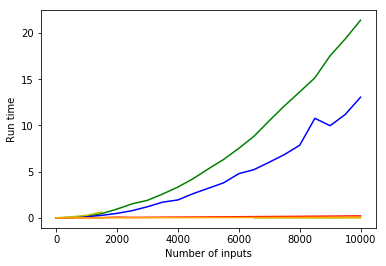

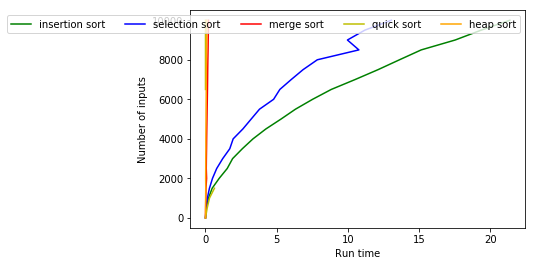

In [88]:
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
plt.plot( intervals_array, rt0[0][:], color='g')  #insertion sort
plt.plot( intervals_array, rt0[1][:], color='b')  #selection sort
plt.plot( intervals_array, rt0[2][:], color='r')  #merge sort
plt.plot( intervals_array, rt0[3][:], color='y')  #quick sort
plt.plot( intervals_array, rt0[4][:], color='orange')   #heap sort
plt.ylabel("Run time")
plt.xlabel("Number of inputs")
plt.savefig('presortednes0 with 2000.png')
plt.show()

pyl.plot( rt0[0][:], intervals_array, color='g', label='insertion sort')  #insertion sort
pyl.plot( rt0[1][:], intervals_array, color='b', label='selection sort')  #selection sort
pyl.plot( rt0[2][:], intervals_array, color='r', label='merge sort')  #merge sort
pyl.plot( rt0[3][:], intervals_array, color='y', label='quick sort')  #quick sort
pyl.plot( rt0[4][:], intervals_array, color='orange', label='heap sort')   #heap sort
pyl.legend( loc=1, ncol=5)
pyl.xlabel("Run time")
pyl.ylabel("Number of inputs")
pyl.show()


In [22]:
# Python program for implementation of Quicksort 

# This function is same in both iterative and recursive 
def partition(arr,l,h): 
    i = ( l - 1 ) 
    x = arr[h] 

    for j in range(l , h): 
        if arr[j] <= x: 

            i = i+1
            arr[i],arr[j] = arr[j],arr[i] 

    arr[i+1],arr[h] = arr[h],arr[i+1] 
    return (i+1) 

# Function to do Quick sort 
# arr[] --> Array to be sorted, 
# l --> Starting index, 
# h --> Ending index 
def quick_sort(arr): 
    l = 0
    h = arr.shape[0] - 1
    size = h-l+1
    stack = [0] * (size) 

    top = -1

    top = top + 1
    stack[top] = l #stack[0]
    top = top + 1
    stack[top] = h #stack[1]

    while top >= 0: 
    
        h = stack[top] 
        top = top - 1
        l = stack[top] 
        top = top - 1
 
        p = partition( arr, l, h ) 

        if p-1 > l: 
            top = top + 1
            stack[top] = l 
            top = top + 1
            stack[top] = p - 1

        if p+1 < h: 
            top = top + 1
            stack[top] = p + 1
            top = top + 1
            stack[top] = h 
            
    return arr
